Reading in the abalone dataset from UC Irvine's Machine Learning repository.

In [1]:
col_names = c("Sex", "Length", "Diameter", "Height", "Whole.weight", "Shucked.weight", "Viscera.weight", "Shell.weight", "Rings")
abalone <- read.table('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', sep="," , col.names=col_names)
head(abalone)

Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### Description of variables in context :


**Sex:** Male (M), Female (F), and Infant (I)

**Length:** Longest shell measurement (mm)
 
**Diameter:** Measurement perpendicular to length (mm)

**Height:** Height as measured with with meat in shell (mm)
 
**Whole weight:** whole abalone weight pre-bleeding (grams)

**Shucked weight:** weight of meat (grams)

**Viscera weight:** gut weight post-bleeding (grams)

**Shell weight:** weight after being dried (grams)

**Rings:** Integer number of rings per specimen 

Before performing any rigorous statistical tests, I first check to see if any NA values exist in this dataset:

In [2]:
any(is.na(abalone))
# no NA values exist

[1] FALSE

As part of my initial exploration I use the summary() command to see how data is distributed across each of our variables of interest. From my observation, Length and Diameter have similar variance as both look to be equally spread out from their mean. This is likely due to the fact Diameter is the measurement taken perpendicular to Length.

In [3]:
summary(abalone)

 Sex          Length         Diameter          Height        Whole.weight   
 F:1307   Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 I:1342   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 M:1528   Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
          Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
          3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
          Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
 Shucked.weight   Viscera.weight    Shell.weight        Rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   : 9.934  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.00

Confirm the above hypothesis by looking at variance of each variable:

In [4]:
var(abalone$Diameter)
var(abalone$Length)

[1] 0.009848551

[1] 0.01442231

Moving onto visualzing my data I want to first compare the number of Rings across the different "Sex" that are part of this dataset. 

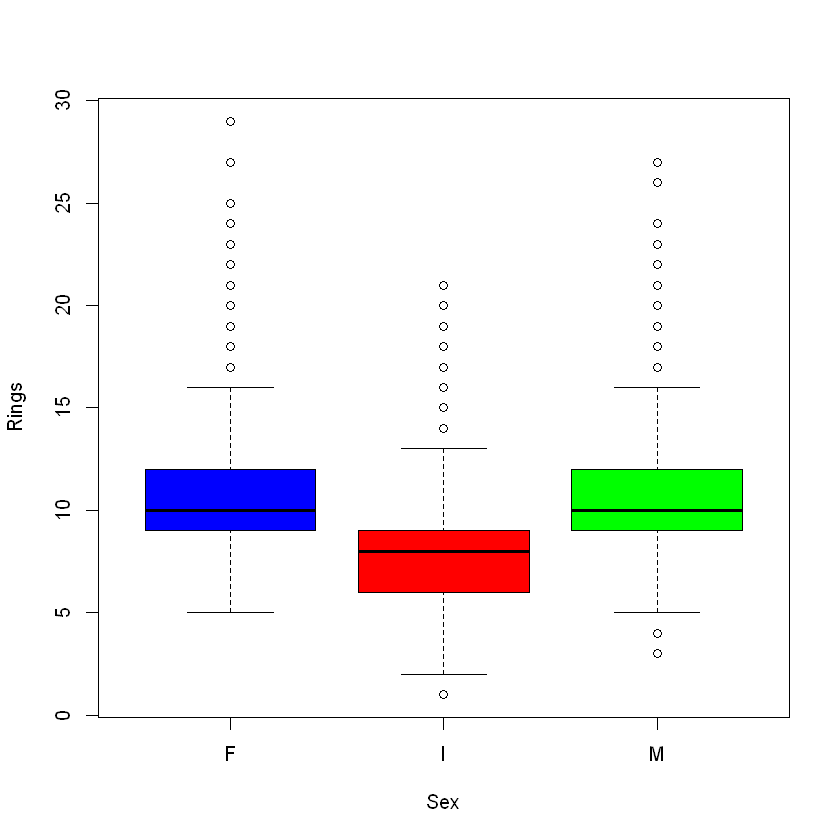

In [5]:
boxplot(Rings~Sex, col = c('blue','red','green'),data=abalone)

Based on the above boxplot it appears that Female and Male abalone roughly follow the same distribution with both having median Ring counts of roughly 10. In addition the Female and Male distribution appear to be more right skewed than the Infant subset. 

In [6]:
numeric_columns <- Filter(is.numeric,abalone)
cor(numeric_columns)

,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
Length,1.0000000,0.9868116,0.8275536,0.9252612,0.8979137,0.9030177,0.8977056,0.5567196
Diameter,0.9868116,1.0000000,0.8336837,0.9254521,0.8931625,0.8997244,0.9053298,0.5746599
Height,0.8275536,0.8336837,1.0000000,0.8192208,0.7749723,0.7983193,0.8173380,0.5574673
Whole.weight,0.9252612,0.9254521,0.8192208,1.0000000,0.9694055,0.9663751,0.9553554,0.5403897
Shucked.weight,0.8979137,0.8931625,0.7749723,0.9694055,1.0000000,0.9319613,0.8826171,0.4208837
Viscera.weight,0.9030177,0.8997244,0.7983193,0.9663751,0.9319613,1.0000000,0.9076563,0.5038192
Shell.weight,0.8977056,0.9053298,0.8173380,0.9553554,0.8826171,0.9076563,1.0000000,0.6275740
Rings,0.5567196,0.5746599,0.5574673,0.5403897,0.4208837,0.5038192,0.6275740,1.0000000


After calculating the correlation between each of the numeric pairs in this dataset it appears that Length and Diameter have the strongest linear relationship with an r = 0.99 indicating a strong positive linear relationship between the two variables. Conversely, Rings and Shucked.weight have the weakest linear relationship with r = 0.42 indiciating a moderate positive linear relationship between the two variables. This is not worth investigating further since we are told Diameter is perpendicular to Length. Let us move on to investigating other relationships.

One relationship that is worth investigating is the relationship between Rings and the Length of an abalone. Common sense would dictate that the larger an abalone the more rings it has, but is that necessarily true? Let's observe how this relationship varies first using an interaction plot across different Sex:

In [7]:
summary(aov(Rings~Length*as.factor(Sex), data=abalone))

                        Df Sum Sq Mean Sq F value   Pr(>F)    
Length                   1  13455   13455 1969.12  < 2e-16 ***
as.factor(Sex)           2   1070     535   78.26  < 2e-16 ***
Length:as.factor(Sex)    2    387     194   28.33 6.04e-13 ***
Residuals             4171  28499       7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The Length of an abalone does much of the heavy lifting as a predictor. In addition the Length and Sex interaction is worth investigating as well as Sex and Length on their own.

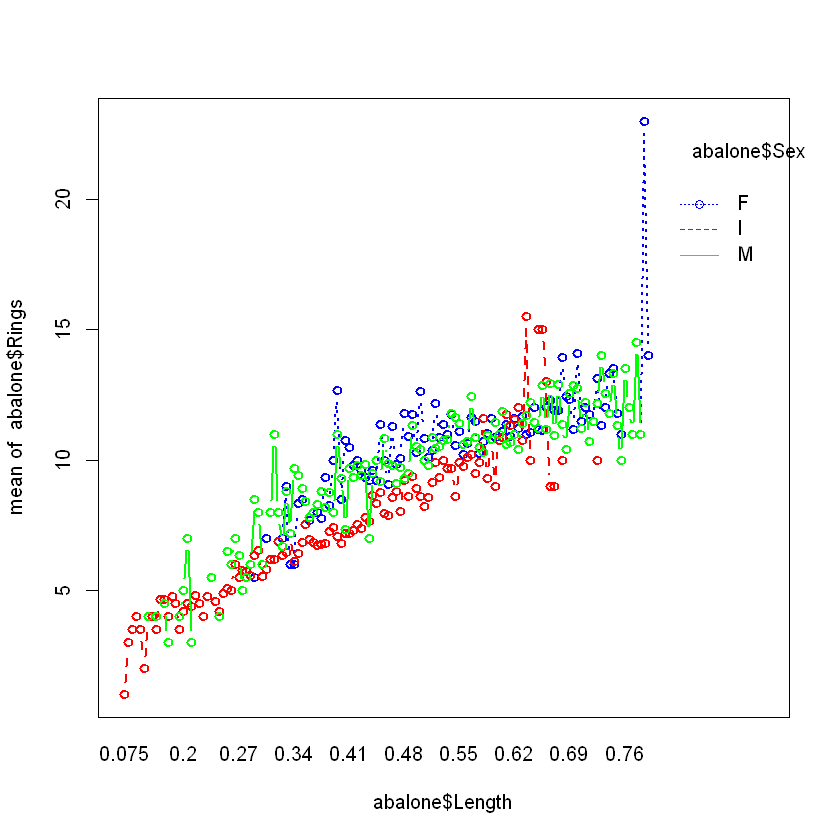

In [8]:
interaction.plot(x.factor=abalone$Length,trace.factor=abalone$Sex, response=abalone$Rings, col=c('blue','red','green'), lwd=2, type='b', pch=1)

The effect of Length on Rings is pretty clear with all 3 lines increasing. The effect of Sex on Length is mostly clear with Male and Female abalone's seemingly following the same trend, and Infants (juveniles) falling slightly beloe as a result of having fewer rings and shorter length. However the effect of Sex depends depends on Length, or vice versa seeing that the lines are not all perfectly parallel.